<a href="https://colab.research.google.com/github/Cuong2812/Weather-Prediction/blob/main/Arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('test.csv', index_col='date', parse_dates=True)
df.index = pd.to_datetime(df.index)
X=df.values
train,test = train_test_split(X,test_size=0.05,shuffle=False)
history = [x for x in X]
predictions = list()

In [ ]:
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


KeyboardInterrupt: ignored

In [ ]:
model = ARIMA(history, order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit = model.fit()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(history, order=(1,1,1),seasonal_order=(1,1,1,12))
model_fit = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
output=model_fit.forecast(365)

In [ ]:
rmse = sqrt(mean_squared_error(test, output))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6.273


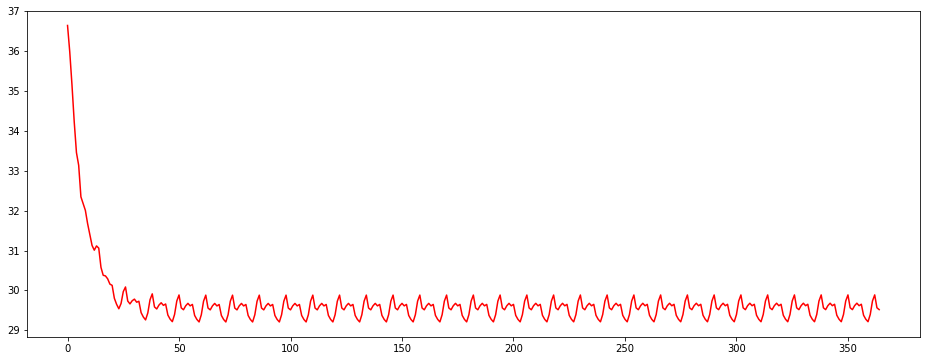

In [ ]:
pyplot.figure(figsize=(16,6))
#pyplot.plot(test)
pyplot.plot(output, color='red')
pyplot.show()

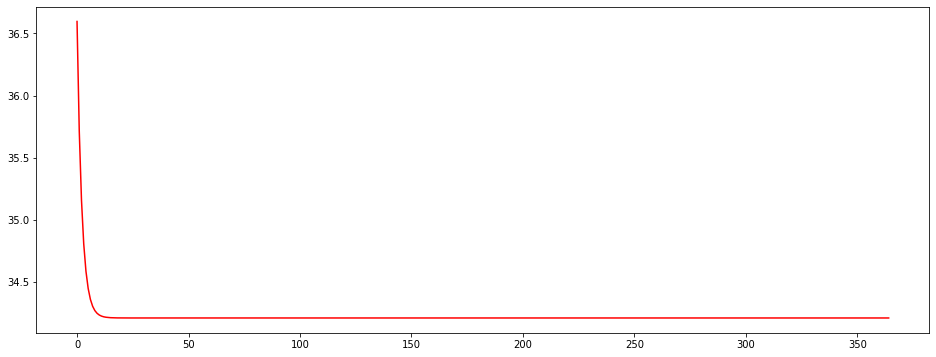

In [ ]:
future=model_fit.forecast(365)
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#pyplot.plot(data.values)
pyplot.figure(figsize=(16,6))
pyplot.plot(future,color='red')
pyplot.show()